## پیدا کردن خانه مناسب دانشجویی در رشت


یکی از کارهایی که میخواستیم انجام بدیم این بود که یک خانه (دانشجویی) با قیمت
 مناسب برای خودمون پیدا کنیم. از این جهت یک سری داده حدود ۱۰۰ تا از جاهای مختلف استخراج کردم و به ذهنم رسید که بیام و یک مدل رگرسیون هم روی این داده ها برازش کنم.


---

مدل رگرسیون رو از ۰.۶۴۸ رسوندم به ۰.۷۱ 

## import libraries

In [1]:
#‌ وارد کردن کتابخانه های مورد نیاز
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn import  linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## load dataset

In [2]:
# خواندن فایل csv
filepath = 'https://docs.google.com/spreadsheets/d/1_B0reSRNs5_Se-5FPUtUB6AmjT511Ey2e6BjzrD4nY4/export?format=csv&gid=0'
dff = pd.read_csv(filepath , encoding='utf-8')
dff
# در این بلاک کد مستقیم از گوگل شیت دیتا ها وارد میشه اینکار باعث شده که اگه دیتایی اضافه شد به دیتاست نیاز به دانلود لوکال دیتاست نیست

,Rent,Deposit,DoB,Meterage,FloorNum,Area,District,NoB,Elevator,Parking,Storage,Balcony,link
0,25000000,450000000,1404,130,2,گلسار,1,3,1,1,1,0,https://divar.ir/v/%DB%B3-%D8%AE%D9%88%D8%A7%D...
1,8000000,200000000,1391,75,2,آزادگان,4,2,1,1,1,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
2,3000000,400000000,1385,80,3,استقامت,2,2,0,1,1,0,https://divar.ir/v/%D8%A2%D9%BE%D8%A7%D8%B1%D8...
3,6000000,150000000,1395,100,1,استقامت,2,1,0,1,1,0,https://divar.ir/v/%D8%B7%D8%A8%D9%82%D9%87-%D...
4,7500000,320000000,1380,116,1,اسماعیل آباد,1,2,0,1,1,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3000000,80000000,1377,70,1,پاستوریزه,3,0,0,0,1,1,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
121,6000000,300000000,1392,110,1,نخودچر,4,2,0,1,0,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
122,25000000,1000000000,1395,106,4,گلسار,1,2,1,1,1,1,https://divar.ir/v/%D9%88%D8%A7%D8%AD%D8%AF-%D...
123,9000000,300000000,1385,120,1,لاکان شهر,5,2,0,0,1,0,https://divar.ir/v/%D8%A2%D9%BE%D8%A7%D8%B1%D8...


## Preprocessing:
- NaN , null  , inf values
- dublicated rows
- Encode Area column (we droped the Area column and consider making another column with name of District and put corresponding number of the geographic Area in that column , meaning when we see Golsar we put the number 1 in the row of that data in the District column )
- change DoB to Age and scale nRent , Age , meterage
- outlier handling
- number of each variable (check to see why your dummy values are insignificent)

In [3]:
# حذف کردن ستونی که لینک های خانه های رو که استخراج کرده بودم رو در اون قرار داده بودم در اینجا کاربردی نخواهد داشت.
df = dff.drop(['link' , 'Area'] , axis=1)
current_year = 1404
df['Age'] = current_year - df['DoB']

In [4]:
# null values
print(df.isnull().sum())

Rent        0
Deposit     0
DoB         0
Meterage    0
FloorNum    0
District    0
NoB         0
Elevator    0
Parking     0
Storage     0
Balcony     0
Age         0
dtype: int64


In [5]:
# duplicates rows
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
df

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age
0,25000000,450000000,1404,130,2,1,3,1,1,1,0,0
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13
2,3000000,400000000,1385,80,3,2,2,0,1,1,0,19
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
120,3000000,80000000,1377,70,1,3,0,0,0,1,1,27
121,6000000,300000000,1392,110,1,4,2,0,1,0,0,12
122,25000000,1000000000,1395,106,4,1,2,1,1,1,1,9
123,9000000,300000000,1385,120,1,5,2,0,0,1,0,19


### Plots:

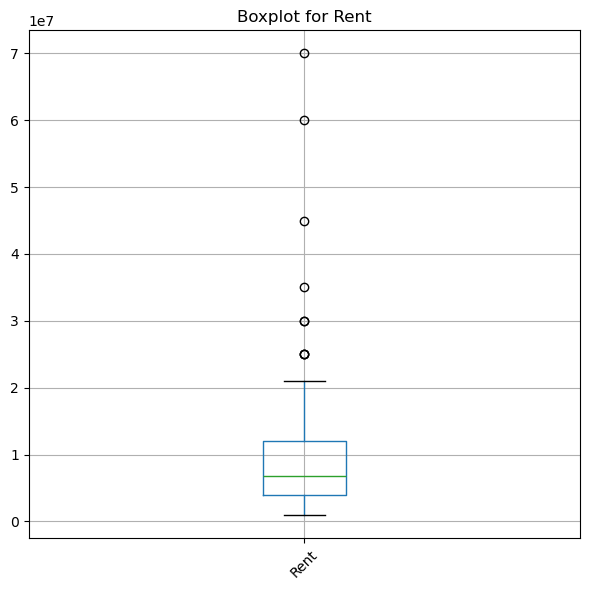

In [6]:
# Assuming df is your DataFrame
dfB = df[['Rent']]
dfB.boxplot(figsize=(6, 6))
plt.title("Boxplot for Rent")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

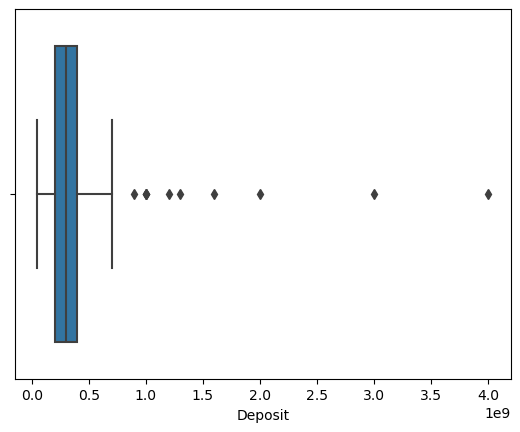

In [7]:
sns.boxplot(x=df['Deposit'])
plt.show()

In [8]:
# FloorNum ,District,NoB,Elevator,Parking,Storage,Balcony
print(df['District'].value_counts())
print(df['FloorNum'].value_counts())
print(df['Balcony'].value_counts())
print(df['DoB'].value_counts())
print(df['NoB'].value_counts())
print(df['Elevator'].value_counts())
print(df['Parking'].value_counts())
print(df['Storage'].value_counts())

District
4    34
1    29
2    22
3    22
5    15
Name: count, dtype: int64
FloorNum
1    55
2    29
3    23
4    14
5     1
Name: count, dtype: int64
Balcony
0    93
1    29
Name: count, dtype: int64
DoB
1390    15
1395    13
1392    12
1401     9
1397     7
1400     7
1396     6
1385     6
1398     5
1388     5
1404     5
1380     4
1391     4
1402     4
1403     3
1399     3
1383     2
1394     2
1389     2
1393     2
1370     2
1386     2
1387     1
1377     1
Name: count, dtype: int64
NoB
2    89
3    16
1    15
4     1
0     1
Name: count, dtype: int64
Elevator
0    78
1    44
Name: count, dtype: int64
Parking
1    91
0    31
Name: count, dtype: int64
Storage
1    109
0     13
Name: count, dtype: int64


In [9]:
df['NoB'] = df['NoB'].apply(lambda x: '3+' if x >= 3 else str(x))

In [10]:
df['FloorNum'] = df['FloorNum'].apply(lambda x: '3+' if x >= 3 else str(x))

In [11]:
df['DoB']

0      1404
1      1391
2      1385
3      1395
4      1380
       ... 
120    1377
121    1392
122    1395
123    1385
124    1396
Name: DoB, Length: 122, dtype: int64

In [12]:
print(df['NoB'].value_counts())
print(df['FloorNum'].value_counts())
print(df['DoB'].value_counts())

NoB
2     89
3+    17
1     15
0      1
Name: count, dtype: int64
FloorNum
1     55
3+    38
2     29
Name: count, dtype: int64
DoB
1390    15
1395    13
1392    12
1401     9
1397     7
1400     7
1396     6
1385     6
1398     5
1388     5
1404     5
1380     4
1391     4
1402     4
1403     3
1399     3
1383     2
1394     2
1389     2
1393     2
1370     2
1386     2
1387     1
1377     1
Name: count, dtype: int64


## EDA

In [13]:
print(f"مینیمم متراژ؛  {df['Meterage'].min()}")
print(f" ماکسیمم متراژ: {df['Meterage'].max()}")

print(f"مینیمم سال ساخت؛  {df['DoB'].min()}")
print(f" ماکسیمم سال ساخت: {df['DoB'].max()}")

مینیمم متراژ؛  40
 ماکسیمم متراژ: 300
مینیمم سال ساخت؛  1370
 ماکسیمم سال ساخت: 1404


In [14]:
sns.jointplot(x='Meterage' , y='Rent' , data=df , alpha=0.6 )

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [15]:
sns.barplot(x='FloorNum' , y='Rent' , data=df , alpha=0.5 )

<Axes: xlabel='FloorNum', ylabel='Rent'>

In [16]:
sns.barplot(x='NoB' , y='Rent' , data=df , alpha=0.5)

<Axes: xlabel='NoB', ylabel='Rent'>

In [17]:
sns.lmplot(x = 'Meterage' , y='Rent' , data=df)
# we can see that Rent and Meterage have a positive linear relation

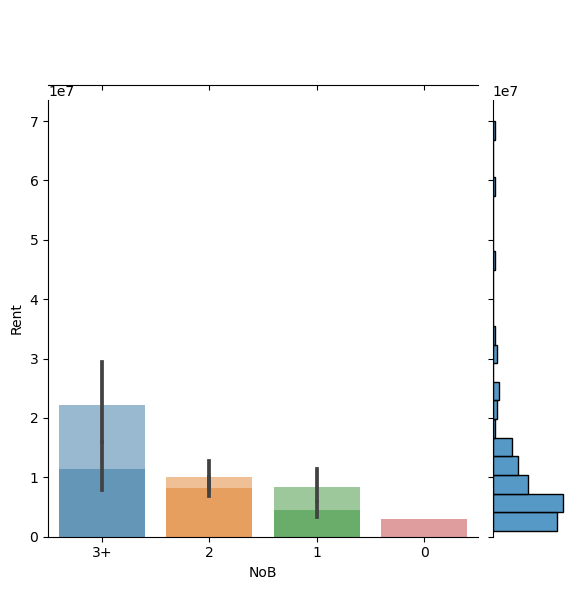

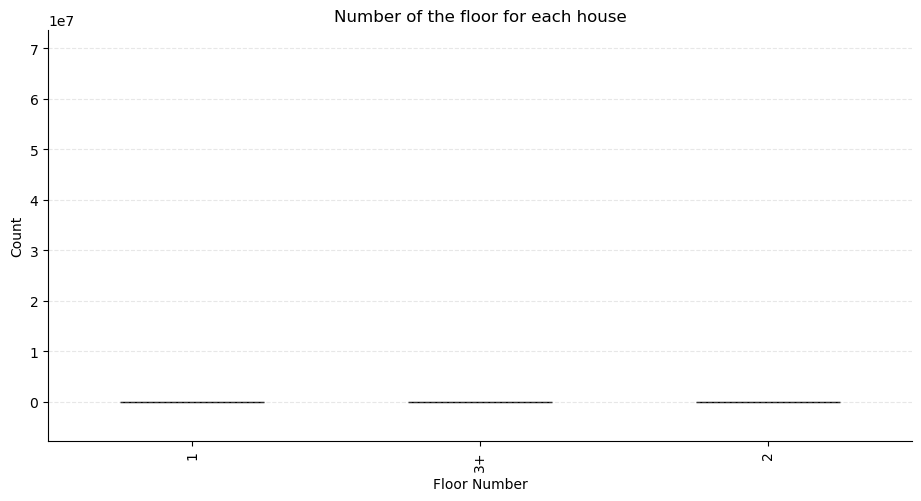

In [18]:
f = df['FloorNum'].value_counts()

f.plot.bar(
    color='purple', 
    edgecolor='black',
    figsize=(10, 5),
    title='Number of the floor for each house',
    xlabel='Floor Number',
    ylabel='Count'
)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [19]:
df = df[df['FloorNum'] != 5]

## Model_0 : Raw Data
-  $R^2 = 0.670$ 

In [20]:
df0 = df.copy()
df0

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age
0,25000000,450000000,1404,130,2,1,3+,1,1,1,0,0
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13
2,3000000,400000000,1385,80,3+,2,2,0,1,1,0,19
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
120,3000000,80000000,1377,70,1,3,0,0,0,1,1,27
121,6000000,300000000,1392,110,1,4,2,0,1,0,0,12
122,25000000,1000000000,1395,106,3+,1,2,1,1,1,1,9
123,9000000,300000000,1385,120,1,5,2,0,0,1,0,19


In [21]:
df0['DoB']

0      1404
1      1391
2      1385
3      1395
4      1380
       ... 
120    1377
121    1392
122    1395
123    1385
124    1396
Name: DoB, Length: 122, dtype: int64

In [22]:
df0 = df.copy()
Y = df0['Rent']
X = df0[['DoB' , 'Meterage']].assign(const = 1)

model = sm.OLS(Y , X)
results0 = model.fit()
print(results0.summary())

# note[2] : is from we did not normalize Rent column i think

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.70e-28
Time:                        00:14:23   Log-Likelihood:                -2075.2
No. Observations:                 122   AIC:                             4156.
Df Residuals:                     119   BIC:                             4165.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DoB         1.523e+05   8.14e+04      1.871      0.0

In [23]:
df0['predictions'] = results0.fittedvalues
df0

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age,predictions
0,25000000,450000000,1404,130,2,1,3+,1,1,1,0,0,1.791743e+07
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13,5.038619e+06
2,3000000,400000000,1385,80,3+,2,2,0,1,1,0,19,5.115636e+06
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9,1.060187e+07
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24,1.148798e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3000000,80000000,1377,70,1,3,0,0,0,1,1,27,1.915623e+06
121,6000000,300000000,1392,110,1,4,2,0,1,0,0,12,1.212659e+07
122,25000000,1000000000,1395,106,3+,1,2,1,1,1,1,9,1.179084e+07
123,9000000,300000000,1385,120,1,5,2,0,0,1,0,19,1.304212e+07


## Model_1 : making deposit and Rent in a one column
- $R^2 = 0.648$

In [24]:
df1 = df.copy()

In [25]:
# normalize two numerical columns
df1['Rent'] = df1['Rent'] / 1000000
df1['Deposit'] = df1['Deposit'] / 10000000

In [26]:
df1['nRent'] = df1['Rent'] + df1['Deposit'] 

In [27]:
Y = df1['nRent']
X = df1[['DoB', 'DoB','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.10e-27
Time:                        00:14:23   Log-Likelihood:                -603.81
No. Observations:                 122   AIC:                             1214.
Df Residuals:                     119   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DoB            0.5394      0.235      2.293      0.0

In [28]:
df1['predictions'] = results1.fittedvalues
df1

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age,nRent,predictions
0,25.0,45.0,1404,130,2,1,3+,1,1,1,0,0,70.0,99.831837
1,8.0,20.0,1391,75,2,4,2,1,1,1,0,13,28.0,25.462334
2,3.0,40.0,1385,80,3+,2,2,0,1,1,0,19,43.0,24.475691
3,6.0,15.0,1395,100,1,2,1,0,1,1,0,9,21.0,57.207190
4,7.5,32.0,1380,116,1,1,2,0,1,1,0,24,39.5,58.580752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,8.0,1377,70,1,3,0,0,0,1,1,27,11.0,4.873641
121,6.0,30.0,1392,110,1,4,2,0,1,0,0,12,36.0,64.942805
122,25.0,100.0,1395,106,3+,1,2,1,1,1,1,9,125.0,63.790339
123,9.0,30.0,1385,120,1,5,2,0,0,1,0,19,39.0,68.363352


## Model_2: with Age variable:
- $R^2 = 0.648$


In [29]:
df2 = df1.copy()
current_year = 1404
df2['Age'] = df['Age']
df2 = df2[['nRent' , 'Age' , 'Meterage']]
df2
# not a good idea to change the DoB to Age
Y = df2['nRent']
X = df2[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results2 = model.fit()
print(results2.summary())

df2['predictions'] = results2.fittedvalues
df2

# why when i changed DoB to age R^2 decresed
# because we have non-linear curve and forcing a linear like Age (current_year - DoB) can have loss in important information
sns.lmplot(x='DoB', y='Rent', data=df, lowess=True, line_kws={'color': 'red'})
sns.lmplot(x='Age', y='Rent', data=df, lowess=True, line_kws={'color': 'purple'})

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.10e-27
Time:                        00:14:23   Log-Likelihood:                -603.81
No. Observations:                 122   AIC:                             1214.
Df Residuals:                     119   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -1.0788      0.470     -2.293      0.0

## Model_3: with Scaled variables (Z - score)
- $R^2 = 0.648$

In [30]:
df3 = df2.copy()

In [31]:
scaler =  StandardScaler() 
df3[['Age', 'Meterage' , 'nRent']] = scaler.fit_transform(df3[['Age', 'Meterage','nRent']])

In [32]:
df3

,nRent,Age,Meterage,predictions
0,0.325819,-1.552153,0.848101,99.831837
1,-0.410908,0.366565,-0.532815,25.462334
2,-0.147791,1.252127,-0.407278,24.475691
3,-0.533695,-0.223810,0.094874,57.207190
4,-0.209185,1.990095,0.496595,58.580752
...,...,...,...,...
120,-0.709106,2.432876,-0.658353,4.873641
121,-0.270579,0.218971,0.345949,64.942805
122,1.290580,-0.223810,0.245519,63.790339
123,-0.217955,1.252127,0.597025,68.363352


In [33]:
Y = df3['nRent']
X = df3[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results3 = model.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.10e-27
Time:                        00:14:23   Log-Likelihood:                -110.53
No. Observations:                 122   AIC:                             227.1
Df Residuals:                     119   BIC:                             235.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1282      0.056     -2.293      0.0

In [34]:
df3['predictions'] = results3.fittedvalues
df3

,nRent,Age,Meterage,predictions
0,0.325819,-1.552153,0.848101,0.849102
1,-0.410908,0.366565,-0.532815,-0.455421
2,-0.147791,1.252127,-0.407278,-0.472728
3,-0.533695,-0.223810,0.094874,0.101419
4,-0.209185,1.990095,0.496595,0.125513
...,...,...,...,...
120,-0.709106,2.432876,-0.658353,-0.816570
121,-0.270579,0.218971,0.345949,0.237110
122,1.290580,-0.223810,0.245519,0.216895
123,-0.217955,1.252127,0.597025,0.297110


## Model_4: with Scaled Variables (MinMaxScaler)
- $R^2 = 0.648$
- but actually the predictions that i have with this model is better and i dont get multicollinearity Error

In [35]:
df4 = df2.copy()

In [36]:
scaler =  MinMaxScaler()  
df4[['Age', 'Meterage' , 'nRent']] = scaler.fit_transform(df3[['Age', 'Meterage','nRent']])

In [37]:
Y = df4['nRent']
X = df4[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.10e-27
Time:                        00:14:23   Log-Likelihood:                 144.47
No. Observations:                 122   AIC:                            -282.9
Df Residuals:                     119   BIC:                            -274.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0796      0.035     -2.293      0.0

In [38]:
df4['predictions'] = results4.fittedvalues
df4

,nRent,Age,Meterage,predictions
0,0.132321,0.000000,0.346154,0.197032
1,0.041215,0.382353,0.134615,0.035710
2,0.073753,0.558824,0.153846,0.033570
3,0.026030,0.264706,0.230769,0.104571
4,0.066161,0.705882,0.292308,0.107550
...,...,...,...,...
120,0.004338,0.794118,0.115385,-0.008951
121,0.058568,0.352941,0.269231,0.121351
122,0.251627,0.264706,0.253846,0.118851
123,0.065076,0.558824,0.307692,0.128771


## Using categorical Data

- $R^2: 0.689$
- FloorNum
- District
- NoB
---
are my categorical data

### moving forward we use the Model_4 data and structure

In [39]:
df = df.drop(['Meterage','Age'] , axis=1)

In [40]:
df['DoB'] = df['DoB'].apply(lambda x: f"{int(x // 10 * 10)}s")

In [41]:
def simplify_dob_group(x):
    if x in ['1370s', '1380s']:
        return 'Before 1390'
    else:
        return x

df['DoB'] = df['DoB'].apply(simplify_dob_group)

In [42]:
dataset = df4.copy()
dataset.head()
data = pd.concat([df4, df], axis=1)
data = data.drop(['Rent','Deposit']  , axis=1)
data

,nRent,Age,Meterage,predictions,DoB,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony
0,0.132321,0.000000,0.346154,0.197032,1400s,2,1,3+,1,1,1,0
1,0.041215,0.382353,0.134615,0.035710,1390s,2,4,2,1,1,1,0
2,0.073753,0.558824,0.153846,0.033570,Before 1390,3+,2,2,0,1,1,0
3,0.026030,0.264706,0.230769,0.104571,1390s,1,2,1,0,1,1,0
4,0.066161,0.705882,0.292308,0.107550,Before 1390,1,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.004338,0.794118,0.115385,-0.008951,Before 1390,1,3,0,0,0,1,1
121,0.058568,0.352941,0.269231,0.121351,1390s,1,4,2,0,1,0,0
122,0.251627,0.264706,0.253846,0.118851,1390s,3+,1,2,1,1,1,1
123,0.065076,0.558824,0.307692,0.128771,Before 1390,1,5,2,0,0,1,0


In [43]:
data.head()

,nRent,Age,Meterage,predictions,DoB,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony
0,0.132321,0.000000,0.346154,0.197032,1400s,2,1,3+,1,1,1,0
1,0.041215,0.382353,0.134615,0.035710,1390s,2,4,2,1,1,1,0
2,0.073753,0.558824,0.153846,0.033570,Before 1390,3+,2,2,0,1,1,0
3,0.026030,0.264706,0.230769,0.104571,1390s,1,2,1,0,1,1,0
4,0.066161,0.705882,0.292308,0.107550,Before 1390,1,1,2,0,1,1,0


In [44]:
data = pd.get_dummies(data , columns=['FloorNum','District','NoB' , 'Elevator' , 'DoB'] , drop_first=True )
# drop_first help us to not fall into Multicollinearity trap. it compare remainder group to the reference group
data

,nRent,Age,Meterage,predictions,Parking,Storage,Balcony,FloorNum_2,FloorNum_3+,District_2,District_3,District_4,District_5,NoB_1,NoB_2,NoB_3+,Elevator_1,DoB_1400s,DoB_Before 1390
0,0.132321,0.000000,0.346154,0.197032,1,1,0,True,False,False,False,False,False,False,False,True,True,True,False
1,0.041215,0.382353,0.134615,0.035710,1,1,0,True,False,False,False,True,False,False,True,False,True,False,False
2,0.073753,0.558824,0.153846,0.033570,1,1,0,False,True,True,False,False,False,False,True,False,False,False,True
3,0.026030,0.264706,0.230769,0.104571,1,1,0,False,False,True,False,False,False,True,False,False,False,False,False
4,0.066161,0.705882,0.292308,0.107550,1,1,0,False,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.004338,0.794118,0.115385,-0.008951,0,1,1,False,False,False,True,False,False,False,False,False,False,False,True
121,0.058568,0.352941,0.269231,0.121351,1,0,0,False,False,False,False,True,False,False,True,False,False,False,False
122,0.251627,0.264706,0.253846,0.118851,1,1,1,False,True,False,False,False,False,False,True,False,True,False,False
123,0.065076,0.558824,0.307692,0.128771,0,1,0,False,False,False,False,False,True,False,True,False,False,False,True


In [45]:
data.columns

Index(['nRent', 'Age', 'Meterage', 'predictions', 'Parking', 'Storage',
       'Balcony', 'FloorNum_2', 'FloorNum_3+', 'District_2', 'District_3',
       'District_4', 'District_5', 'NoB_1', 'NoB_2', 'NoB_3+', 'Elevator_1',
       'DoB_1400s', 'DoB_Before 1390'],
      dtype='object')

In [46]:
print(df.columns.tolist())

['Rent', 'Deposit', 'DoB', 'FloorNum', 'District', 'NoB', 'Elevator', 'Parking', 'Storage', 'Balcony']


In [47]:
dummy_cols = ['FloorNum_2', 'FloorNum_3+', 'District_2', 'District_3',
       'District_4', 'District_5', 'NoB_1','NoB_2', 'NoB_3+', 'Elevator_1',
       'DoB_1400s', 'DoB_Before 1390']
selected_data = data[dummy_cols]
data[dummy_cols] = data[dummy_cols].astype(int)
data

,nRent,Age,Meterage,predictions,Parking,Storage,Balcony,FloorNum_2,FloorNum_3+,District_2,District_3,District_4,District_5,NoB_1,NoB_2,NoB_3+,Elevator_1,DoB_1400s,DoB_Before 1390
0,0.132321,0.000000,0.346154,0.197032,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0
1,0.041215,0.382353,0.134615,0.035710,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,0.073753,0.558824,0.153846,0.033570,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1
3,0.026030,0.264706,0.230769,0.104571,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.066161,0.705882,0.292308,0.107550,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.004338,0.794118,0.115385,-0.008951,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
121,0.058568,0.352941,0.269231,0.121351,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
122,0.251627,0.264706,0.253846,0.118851,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0
123,0.065076,0.558824,0.307692,0.128771,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [48]:

np.asarray(data)

array([[0.13232104, 0.        , 0.34615385, ..., 1.        , 1.        ,
        0.        ],
       [0.04121475, 0.38235294, 0.13461538, ..., 1.        , 0.        ,
        0.        ],
       [0.07375271, 0.55882353, 0.15384615, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.2516269 , 0.26470588, 0.25384615, ..., 1.        , 0.        ,
        0.        ],
       [0.06507592, 0.55882353, 0.30769231, ..., 0.        , 0.        ,
        1.        ],
       [0.02603037, 0.23529412, 0.03846154, ..., 0.        , 0.        ,
        0.        ]])

In [49]:
X = data.drop(['nRent' , 'predictions' , 'Age'  ] , axis = 1).assign(const=1)
result = sm.OLS(Y , X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     14.34
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.06e-19
Time:                        00:14:23   Log-Likelihood:                 152.57
No. Observations:                 122   AIC:                            -271.1
Df Residuals:                     105   BIC:                            -223.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Meterage            0.7299      0.068     

## + binary Variables
- these variables did not help the model at all even $R^2$ adjusted stayed the same as before so i will not use these:
    1. first of all storage have only 8 options that do not have Storage so i will not give us the signal that we need
    2. most of the houses in our dataset have parking so we can not make good assumptions about how much it influence our model
    3. but when used Elevator column it actually improved $R^2$ by 0.003 so i will used that because it is actually balanced 
  

In [50]:
# i comment this section due to insignificent of that in our model
# data = pd.get_dummies(data , columns=['Elevator','Parking','Storage'] , drop_first=True )
# data
# dummy_cols = ['Elevator_1', 'Parking_1', 'Storage_1']
# selected_data = data[dummy_cols]
# data[dummy_cols] = data[dummy_cols].astype(int)
# data
# X = data.drop(['nRent' , 'predictions'] , axis = 1).assign(const=1)
# result = sm.OLS(Y , X).fit()
# print(result.summary())

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


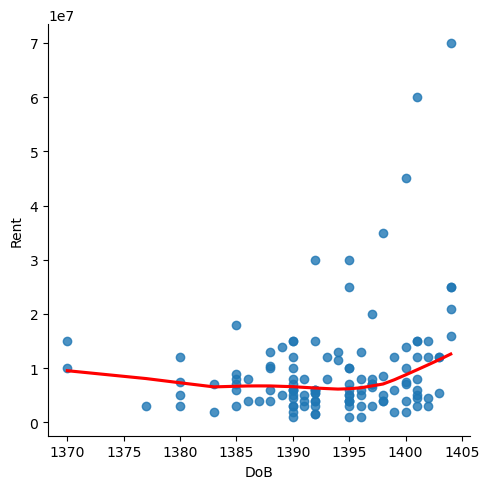

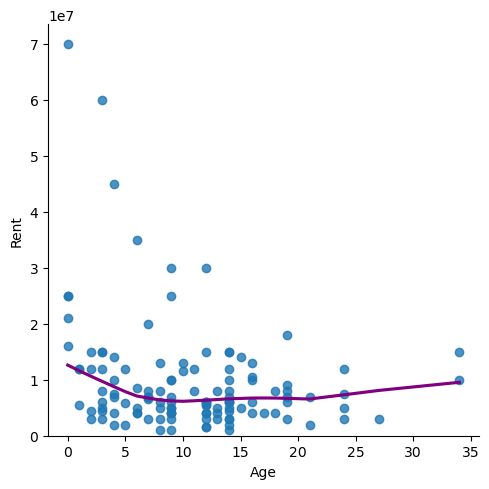

In [51]:
sns.histplot(data.nRent );
plt.show()

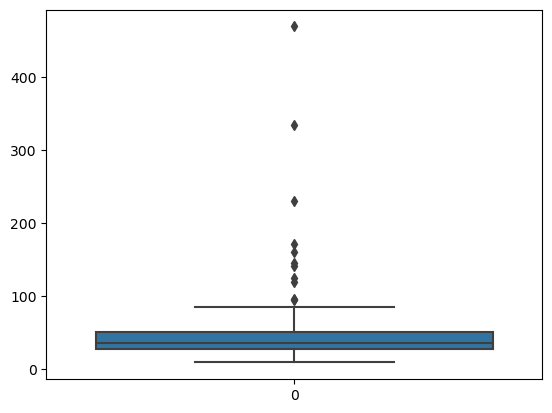

In [52]:
sns.boxplot(df1.nRent);
plt.show()

## after using Log Transformation:
 - because as we can see in histogram below our Y (target variable is skewed to right) so after we use this $R^2$ goes from **0.689** to **0.713**.

In [53]:
y = data.nRent

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


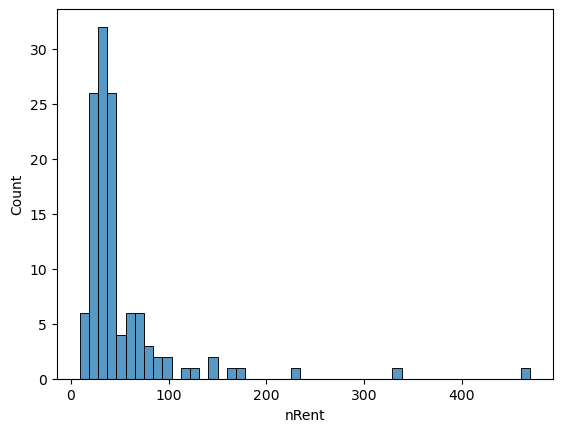

In [54]:
# before
sns.histplot(df1.nRent)
plt.show()

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


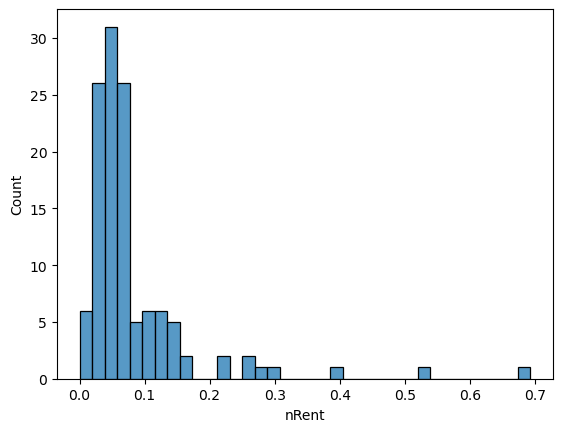

In [55]:
# after
y = np.log1p(y)
sns.histplot(y)
plt.show()

In [56]:
data['nRent'] = y

In [57]:
X

,Meterage,Parking,Storage,Balcony,FloorNum_2,FloorNum_3+,District_2,District_3,District_4,District_5,NoB_1,NoB_2,NoB_3+,Elevator_1,DoB_1400s,DoB_Before 1390,const
0,0.346154,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,0.134615,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1
2,0.153846,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1
3,0.230769,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0.292308,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.115385,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
121,0.269231,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
122,0.253846,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1
123,0.307692,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1


In [58]:
X = data.drop(['nRent' , 'predictions' , 'Age'] , axis = 1).assign(const=1)
result = sm.OLS(y , X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.15
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.73e-21
Time:                        00:14:24   Log-Likelihood:                 192.26
No. Observations:                 122   AIC:                            -350.5
Df Residuals:                     105   BIC:                            -302.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Meterage            0.5203      0.049     

## With Another method : Scikit-learn
- first we need to Train_Test_split our data like any other supervised Learning Model
- We model a regression
- Evaluate the Regression
- we got $R^2 : 0.78$ idk howw??
  

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error 

In [60]:
datasc = data.copy()
X1 = datasc.drop(['nRent','predictions','Age'] , axis = 1)
Y1 = datasc['nRent']
X.shape , y.shape

((122, 17), (122,))

In [61]:
X_train , X_test , y_train , y_test = train_test_split(X1 , Y1 , train_size = 0.8 , random_state=42)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train , y_train)

LinearRegression()

In [64]:
y_hat = model.predict(X_test)
len(y_hat)

25

In [65]:
r2 = r2_score(y_test,y_hat)
mse = mean_squared_error(y_test,y_hat)
mae = mean_absolute_error(y_test,y_hat)
intercept = model.intercept_
print(f'r2: {r2} ,mse: {mse} , mae:{mae} , intercept: {intercept} ')

r2: 0.4050614977094086 ,mse: 0.0017742615195947093 , mae:0.0320281309977903 , intercept: 0.009082332247697819 


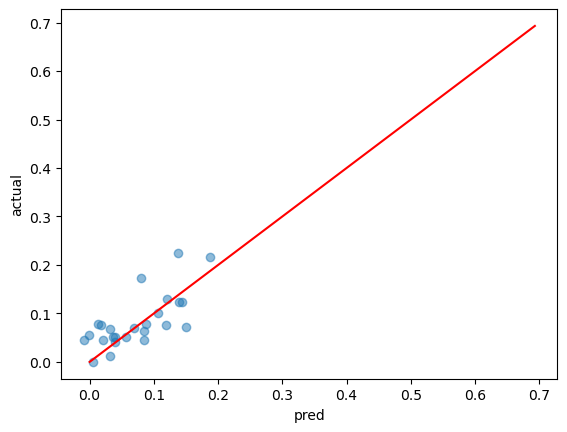

In [66]:
plt.scatter(y_hat , y_test , alpha=0.5)
plt.plot([y.min() , y.max()] , [y.min() , y.max()] , color='red')
plt.xlabel('pred')
plt.ylabel('actual')
plt.show()

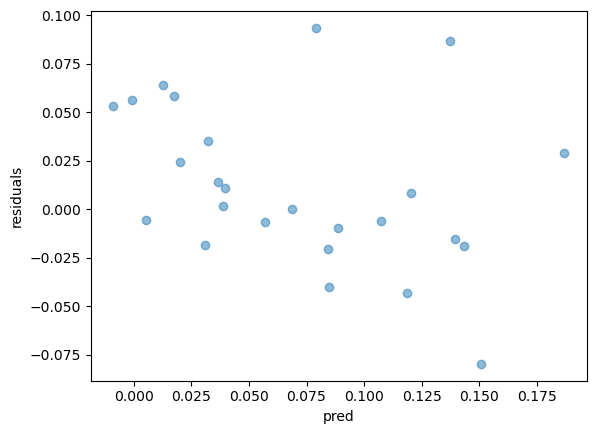

In [67]:
plt.scatter(y_hat , y_test - y_hat  , alpha = 0.5)
plt.xlabel('pred')
plt.ylabel('residuals')
plt.show()

## VIF

In [68]:
def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    vif_dict , tol_dict = {} , {}
    for col in df.drop(columns=['const']):
        y = df[col]
        X = df.drop(columns=[col])
        r_sq = LinearRegression().fit(X,y).score(X,y)
        if r_sq < 1:
            vif = 1/(1-r_sq)
        else:
            vif = 100
        vif_dict[col] = vif
        tol = 1 - r_sq
        tol_dict[col] = tol

        df_output = pd.DataFrame({'vif' :vif_dict , 'tol' : tol_dict })
        
    return df_output.sort_values(by=['vif'] , ascending=False)

    


In [69]:
vif(X)

,vif,tol
NoB_2,29.488981,0.033911
NoB_3+,19.980796,0.050048
NoB_1,17.322384,0.057729
Meterage,2.367335,0.422416
District_4,1.965314,0.508824
FloorNum_3+,1.848982,0.540838
Elevator_1,1.729728,0.578126
District_3,1.706011,0.586163
District_5,1.688372,0.592287
FloorNum_2,1.628703,0.613986


In [70]:
data.to_csv('RashtDataAfterPre')

# Aditionals

## Updates:
- when i delete some of the outliers my $R^2$ got lower than it was so i decide that i should keep them
- i noticed that i have only one instance of 4 bedroom houses and 15 3 bedroom houses  in this case i can put these into one case and call it 3+ (p_value actually improved , from )
- combined 3+ Floor number together and my $R^2$ actually improved
- when i put binary variables ['Elevator','Parking','Storage'] to my model i did not imporved anything so i might consider deleting them (using just Elevator column imporved my model)
- in DoB (data of building) column i grouped this column into 3 different sections DoB_1390s , DoB_1400s, (base category is "Before 1390") and my model improved actually pretty good

- new challenge how can i make it useable for users that are not familiar with the normalization and other things that i did to my dataset ?
- 

## 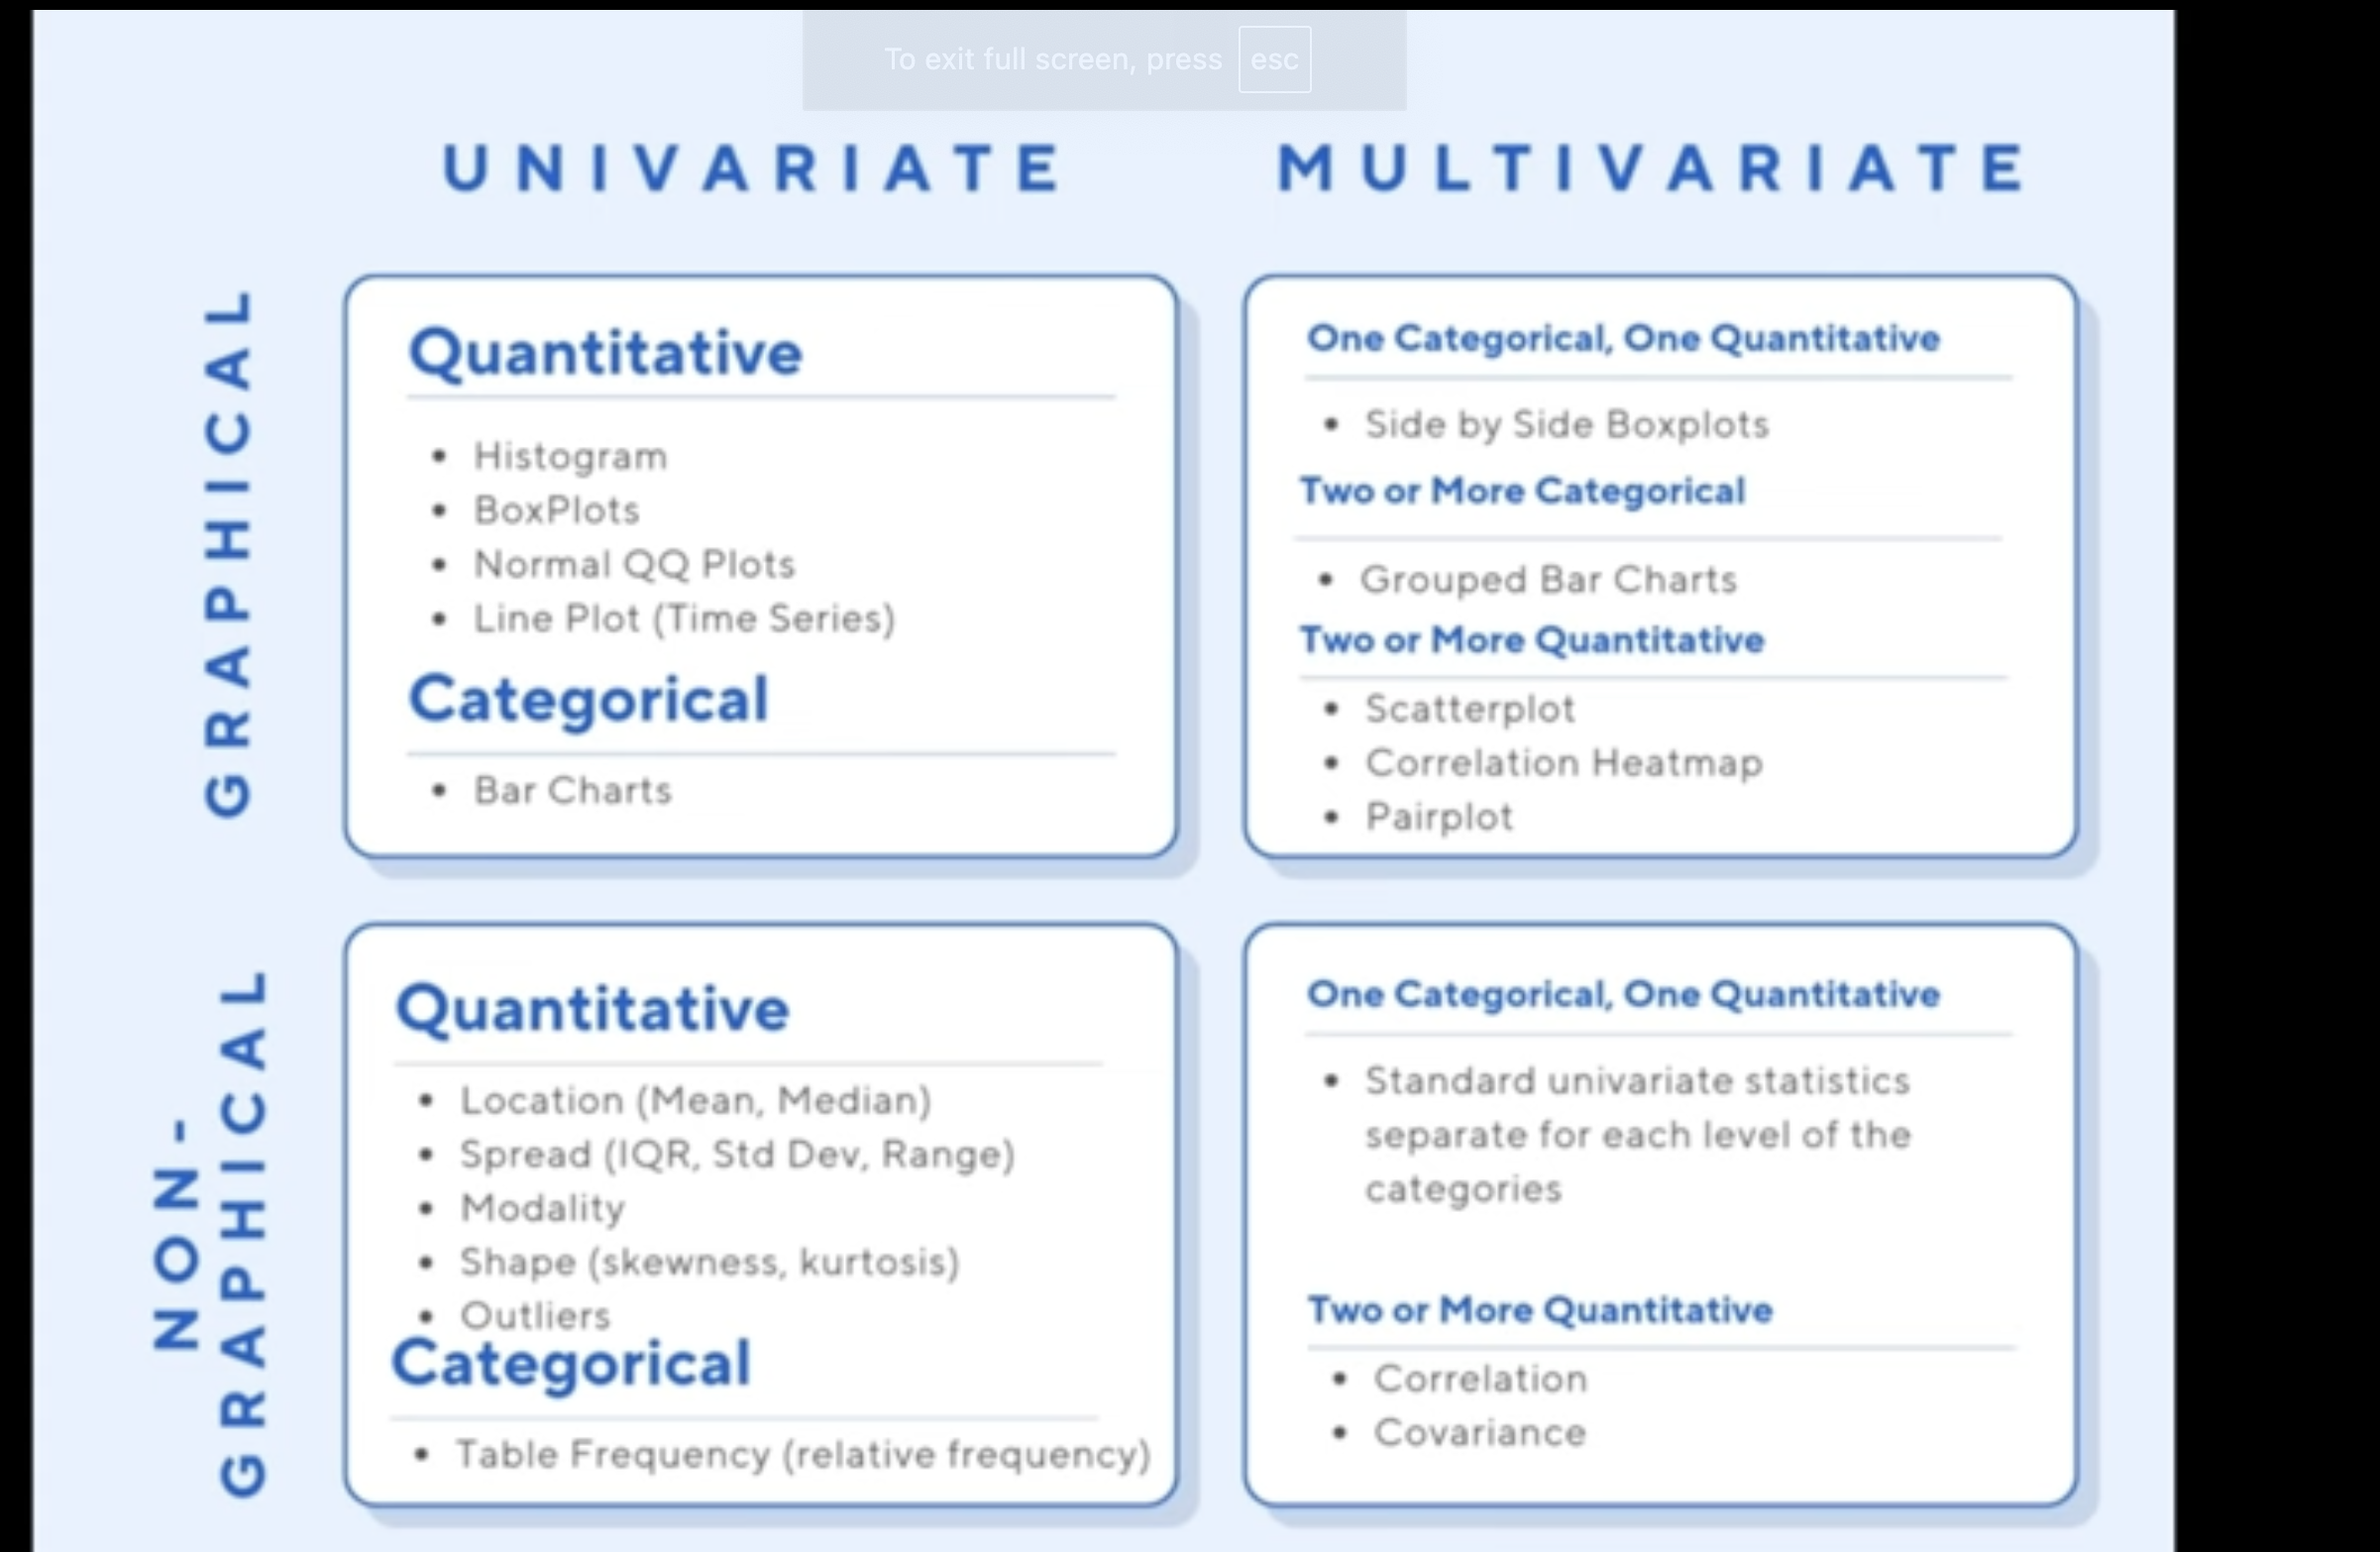Sources:

-  https://www.2nabsh.com/%D9%85%D8%AD%D9%84%D9%87/%D8%B1%D8%B4%D8%AA
-  https://www.youtube.com/watch?v=53lhpwa3rwY&ab_channel=JaradNiemi
-  https://www.youtube.com/watch?v=2IZKK3pJQjg&ab_channel=freeCodeCamp.org
-  oulier handling : https://www.youtube.com/watch?v=jmAuVP_UOn0&ab_channel=SixSigmaProSMART
-   https://www.youtube.com/watch?v=2hwR6ASF2yg&ab_channel=Prof.DavidStuckler
- https://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20(NEJM).pdf
-  https://library.virginia.edu/data/articles/getting-started-with-multivariate-multiple-regression#:~:text=Multivariate%20Multiple%20Regression%20is%20a,parent%20income%2C%20and%20so%20forth.
-  https://www.youtube.com/watch?v=3A1z9mUn8n8&ab_channel=DavidDunaetz
-  https://www.youtube.com/watch?v=53lhpwa3rwY (binary regression)
-  https://www.youtube.com/watch?v=9-M4SGzSx0k&list=PLe9UEU4oeAuXcYlG8Bs9uzceeXikeiurD&index=4&ab_channel=MarkKeith
-  https://youtu.be/lGg0LNZplVQ?si=K8pxOdMFxuMx5tTR
-  https://www.youtube.com/watch?v=wPcR9Kmv91g&t=44s&ab_channel=TheDataProf
-  https://www.youtube.com/watch?v=POCvLGRLDzM&t=1069s (foreward feature selection)

## Predictions

In [75]:
user_values = [0.23, 0, 1, 1, 1, 0, 0, 0, 1, 0,1,0,0,0,0,1]
columns = ['Meterage' ,'Parking', 'Storage',
       'Balcony', 'FloorNum_2', 'FloorNum_3+', 'District_2', 'District_3',
       'District_4', 'District_5', 'NoB_1', 'NoB_2', 'NoB_3+', 'Elevator_1',
       'DoB_1400s', 'DoB_Before 1390' ]

In [79]:
X_new = pd.DataFrame([user_values], columns=columns)
X_new = sm.add_constant(X_new)


In [82]:
prediction = model.predict(X_new)
print(prediction)

[0.056269]
